# ACS DATA

## 1 Collect Data

In [1]:
import requests, pandas as pd
year='2019'
dsource='acs'
dname='acs5'
cols1='B01001_001E'
cols2='B17021_002E'
cols3='B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E'
cols4='B01001_005E,B01001_006E,B01001_029E,B01001_030E'
cols5='B25044_003E,B25044_010E' 
cols6='C21007_005E,C21007_008E,C21007_012E,C21007_015E,C21007_020E,C21007_023E,C21007_027E,C21007_030E' 
cols7a='B16004_006E,B16004_007E,B16004_008E,B16004_011E,B16004_012E,B16004_013E,B16004_016E,B16004_017E'
cols7b='B16004_018E,B16004_021E,B16004_022E,B16004_023E,B16004_028E,B16004_029E,B16004_030E,B16004_033E,B16004_034E' 
cols7c='B16004_035E,B16004_038E,B16004_039E,B16004_040E,B16004_043E,B16004_044E,B16004_045E,B16004_050E,B16004_051E'
cols7d='B16004_052E,B16004_055E,B16004_056E,B16004_057E,B16004_060E,B16004_061E,B16004_062E,B16004_065E,B16004_066E,B16004_067E'
cols8='B02001_002E'
state='15'
county='003'

#Base url
base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

#pop
pop= f'{base_url}?get={cols1}&for=block%20group:*&in=state:{state}&in=county:{county}'
pop=requests.get(pop)

# response=requests.get(data_url)
# print(response.text)

#pov
pov= f'{base_url}?get={cols2}&for=block%20group:*&in=state:{state}&in=county:{county}'
pov=requests.get(pov)

#65+
y65= f'{base_url}?get={cols3}&for=block%20group:*&in=state:{state}&in=county:{county}'
y65=requests.get(y65)

#10-17 year olds
y1017= f'{base_url}?get={cols4}&for=block%20group:*&in=state:{state}&in=county:{county}'
y1017=requests.get(y1017)

#zveh
zveh= f'{base_url}?get={cols5}&for=block%20group:*&in=state:{state}&in=county:{county}'
zveh=requests.get(zveh)

#dis
dis= f'{base_url}?get={cols6}&for=block%20group:*&in=state:{state}&in=county:{county}'
dis=requests.get(dis)

#lep1
lep1= f'{base_url}?get={cols7a}&for=block%20group:*&in=state:{state}&in=county:{county}'
lep1=requests.get(lep1)

#lep2
lep2= f'{base_url}?get={cols7b}&for=block%20group:*&in=state:{state}&in=county:{county}'
lep2=requests.get(lep2)

#lep3
lep3= f'{base_url}?get={cols7c}&for=block%20group:*&in=state:{state}&in=county:{county}'
lep3=requests.get(lep3)

#lep4
lep4= f'{base_url}?get={cols7d}&for=block%20group:*&in=state:{state}&in=county:{county}'
lep4=requests.get(lep4)

#white-alone= subtract from pop to get non-white
white= f'{base_url}?get={cols8}&for=block%20group:*&in=state:{state}&in=county:{county}'
white=requests.get(white)

# 2 Convert to df

In [2]:
#pop
pop = pop.json()
pop = pd.DataFrame(pop)
header = pop.iloc[0]
pop = pop[1:]
pop.columns = header

#pov
pov = pov.json()
pov = pd.DataFrame(pov)
header = pov.iloc[0]
pov = pov[1:]
pov.columns = header

#65
y65 = y65.json()
y65 = pd.DataFrame(y65)
header = y65.iloc[0]
y65 = y65[1:]
y65.columns = header

#10-17 yrs
y1017 = y1017.json()
y1017 = pd.DataFrame(y1017)
header = y1017.iloc[0]
y1017 = y1017[1:]
y1017.columns = header

#zveh
zveh = zveh.json()
zveh = pd.DataFrame(zveh)
header = zveh.iloc[0]
zveh = zveh[1:]
zveh.columns = header

#dis
dis = dis.json()
dis = pd.DataFrame(dis)
header = dis.iloc[0]
dis = dis[1:]
dis.columns = header

#lep1
lep1 = lep1.json()
lep1 = pd.DataFrame(lep1)
header = lep1.iloc[0]
lep1 = lep1[1:]
lep1.columns = header

#lep2
lep2 = lep2.json()
lep2 = pd.DataFrame(lep2)
header = lep2.iloc[0]
lep2 = lep2[1:]
lep2.columns = header

#lep3
lep3 = lep3.json()
lep3 = pd.DataFrame(lep3)
header = lep3.iloc[0]
lep3 = lep3[1:]
lep3.columns = header

#lep4
lep4 = lep4.json()
lep4 = pd.DataFrame(lep4)
header = lep4.iloc[0]
lep4 = lep4[1:]
lep4.columns = header

#white
white = white.json()
white = pd.DataFrame(white)
header = white.iloc[0]
white = white[1:]
white.columns = header

## 3 Rename Column and create GEOID

In [3]:
pop = pop.rename(columns = {'block group': 'bg'})
pov = pov.rename(columns = {'block group': 'bg'})
y65 = y65.rename(columns = {'block group': 'bg'})
y1017 = y1017.rename(columns = {'block group': 'bg'})
zveh = zveh.rename(columns = {'block group': 'bg'})
dis = dis.rename(columns = {'block group': 'bg'})
lep1 = lep1.rename(columns = {'block group': 'bg'})
lep2 = lep2.rename(columns = {'block group': 'bg'})
lep3 = lep3.rename(columns = {'block group': 'bg'})
lep4 = lep4.rename(columns = {'block group': 'bg'})
white = white.rename(columns = {'block group': 'bg'})

pop['GEOID']=pop.state+pop.county+pop.tract+pop.bg
pop.drop(columns=['state','county','tract','bg'],inplace=True)

pov['GEOID']=pov.state+pov.county+pov.tract+pov.bg
pov.drop(columns=['state','county','tract','bg'],inplace=True)

y65['GEOID']=y65.state+y65.county+y65.tract+y65.bg
y65.drop(columns=['state','county','tract','bg'],inplace=True)

y1017['GEOID']=y1017.state+y1017.county+y1017.tract+y1017.bg
y1017.drop(columns=['state','county','tract','bg'],inplace=True)

zveh['GEOID']=zveh.state+zveh.county+zveh.tract+zveh.bg
zveh.drop(columns=['state','county','tract','bg'],inplace=True)

dis['GEOID']=dis.state+dis.county+dis.tract+dis.bg
dis.drop(columns=['state','county','tract','bg'],inplace=True)

lep1['GEOID']=lep1.state+lep1.county+lep1.tract+lep1.bg
lep1.drop(columns=['state','county','tract','bg'],inplace=True)

lep2['GEOID']=lep2.state+lep2.county+lep2.tract+lep2.bg
lep2.drop(columns=['state','county','tract','bg'],inplace=True)

lep3['GEOID']=lep3.state+lep3.county+lep3.tract+lep3.bg
lep3.drop(columns=['state','county','tract','bg'],inplace=True)

lep4['GEOID']=lep4.state+lep4.county+lep4.tract+lep4.bg
lep4.drop(columns=['state','county','tract','bg'],inplace=True)

white['GEOID']=white.state+white.county+white.tract+white.bg
white.drop(columns=['state','county','tract','bg'],inplace=True)

## 4 Change Data Types

In [4]:
from functools import reduce
dfs = [pop,pov,y65,y1017,zveh,dis,lep1,lep2,lep3,lep4,white]
df_final = reduce(lambda left,right: pd.merge(left,right,on='GEOID'), dfs)

df1=df_final.fillna(0.0).astype(float)
df1['GEOID']=df1['GEOID'].astype(str)

## 5 Convert Tables into Variables

In [5]:
#pop
df=df1.loc[:, ['GEOID','B01001_001E']]
df_pop=df.loc[:, ['GEOID','B01001_001E']]
df_pop = df_pop.rename(columns = {'B01001_001E': 'pop'})

#pov
df=df1.loc[:, ['GEOID','B17021_002E']]
df_pov=df.loc[:, ['GEOID','B17021_002E']]
df_pov = df_pov.rename(columns = {'B17021_002E': 'pov'})

#65
df=df1.loc[:, ['GEOID','B01001_020E','B01001_021E','B01001_022E','B01001_023E','B01001_024E','B01001_025E','B01001_044E','B01001_045E','B01001_046E','B01001_047E','B01001_048E','B01001_049E']]
df['y65']=df['B01001_020E'] + df['B01001_021E'] + df['B01001_022E'] + df['B01001_023E'] + df['B01001_024E']+ df['B01001_025E']+ df['B01001_044E']+ df['B01001_045E']+ df['B01001_046E']+ df['B01001_047E']+ df['B01001_048E']+ df['B01001_049E']
df_65=df.loc[:, ['GEOID','y65']]

#10-17 years
df=df1.loc[:, ['GEOID','B01001_005E','B01001_006E','B01001_029E','B01001_030E']]
df['y1017']=df['B01001_005E'] + df['B01001_006E'] + df['B01001_029E']+ df['B01001_030E']
df_1017=df.loc[:, ['GEOID','y1017']]

#zveh
df=df1.loc[:, ['GEOID','B25044_003E','B25044_010E']]
df['zveh']=df['B25044_003E'] + df['B25044_010E']
df_zveh=df.loc[:, ['GEOID','zveh']]

#dis
df=df1.loc[:, ['GEOID','C21007_005E','C21007_008E','C21007_012E','C21007_015E','C21007_020E','C21007_023E','C21007_027E','C21007_030E']]
df['dis']= df['C21007_005E'] + df['C21007_008E'] + df['C21007_012E'] + df['C21007_015E'] + df['C21007_020E'] + df['C21007_023E'] + df['C21007_027E'] + df['C21007_030E']
df_dis=df.loc[:, ['GEOID','dis']]

#lep1
df=df1.loc[:, ['GEOID','B16004_006E','B16004_007E','B16004_008E','B16004_011E','B16004_012E','B16004_013E','B16004_016E','B16004_017E']]
df['lep1']=df['B16004_006E']+df['B16004_007E']+df['B16004_008E']+df['B16004_011E']+df['B16004_012E']+df['B16004_013E']+df['B16004_016E']+df['B16004_017E']
df_lep1=df.loc[:, ['GEOID','lep1']]

#lep2
df=df1.loc[:, ['GEOID','B16004_018E','B16004_021E','B16004_022E','B16004_023E','B16004_028E','B16004_029E','B16004_030E','B16004_033E','B16004_034E']]
df['lep2']=df['B16004_018E']+df['B16004_021E']+df['B16004_022E']+df['B16004_023E']+df['B16004_028E']+df['B16004_029E']+df['B16004_030E']+df['B16004_033E']+df['B16004_034E']
df_lep2=df.loc[:, ['GEOID','lep2']]

#lep3
df=df1.loc[:, ['GEOID','B16004_035E','B16004_038E','B16004_039E','B16004_040E','B16004_043E','B16004_044E','B16004_045E','B16004_050E','B16004_051E']]
df['lep3']=df['B16004_035E']+df['B16004_038E']+df['B16004_039E']+df['B16004_040E']+df['B16004_043E']+df['B16004_044E']+df['B16004_045E']+df['B16004_050E']+df['B16004_051E']
df_lep3=df.loc[:, ['GEOID','lep3']]

#lep4
df=df1.loc[:, ['GEOID','B16004_052E','B16004_055E','B16004_056E','B16004_057E','B16004_060E','B16004_061E','B16004_062E','B16004_065E','B16004_066E','B16004_067E']]
df['lep4']=df['B16004_052E']+df['B16004_055E']+df['B16004_056E']+df['B16004_057E']+df['B16004_060E']+df['B16004_061E']+df['B16004_062E']+df['B16004_065E']+df['B16004_066E']+df['B16004_067E']
df_lep4=df.loc[:, ['GEOID','lep4']]

#white
df=df1.loc[:, ['GEOID','B02001_002E']]
df['white']= df['B02001_002E']
df_wht=df.loc[:, ['GEOID','white']]

#final df
df_all = [df_pop,df_pov,df_65,df_1017,df_zveh,df_dis,df_lep1,df_lep2,df_lep3,df_lep4,df_wht]
df_all = reduce(lambda left,right: pd.merge(left,right,on='GEOID'), df_all)
df_all['lep']=df_all['lep1']+df_all['lep2']+df_all['lep3']+df_all['lep4']
df_clean=df_all.loc[:, ['GEOID','pop','pov','y65','y1017','zveh','dis','white','lep']]
df_clean['min']=df_clean['pop'] - df_clean['white']

df_clean=df_clean.loc[:, ['GEOID','pop','pov','y65','y1017','zveh','dis','min','lep']]

## 6 Get Oahu BG GEOID

In [6]:
#!pip install geopandas
import geopandas as gpd
zipfile = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_15_bg_500k.zip"
dmap = gpd.read_file(zipfile)
dmap=dmap.loc[(dmap['COUNTYFP'] == '003') & (dmap['GEOID'] != '150039812001')]
dmap=dmap.loc[:, ['GEOID','geometry']]
dmap.crs = "EPSG:4326"

## 7 Join df and map df

In [16]:
df_clean['GEOID'] = df_clean['GEOID'].astype(str).replace('\.0', '', regex=True)
df_join = dmap.merge(df_clean, on='GEOID')
df_join['geoid'] = df_join.index.astype(str)
df_join=df_join.loc[(df_join['pop'] != 0)] #579 habitable BGs
df_join = df_join[['geoid', 'pov','y65','y1017','zveh','dis','min','lep','geometry']]


In [18]:
df_join.head()

,geoid,pov,y65,y1017,zveh,dis,min,lep,geometry
0,0,19.0,722.0,114.0,156.0,464.0,1606.0,143.0,"POLYGON ((-158.00657 21.47103, -158.00100 21.4..."
1,1,83.0,207.0,239.0,9.0,82.0,1486.0,177.0,"POLYGON ((-157.98403 21.39972, -157.98277 21.4..."
2,2,95.0,482.0,218.0,34.0,253.0,2965.0,545.0,"POLYGON ((-158.03501 21.39724, -158.02978 21.3..."
3,3,139.0,150.0,108.0,68.0,97.0,1465.0,516.0,"POLYGON ((-157.82317 21.28887, -157.82227 21.2..."
4,4,174.0,297.0,99.0,0.0,172.0,1328.0,222.0,"POLYGON ((-157.93556 21.37929, -157.93450 21.3..."


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import PowerTransformer

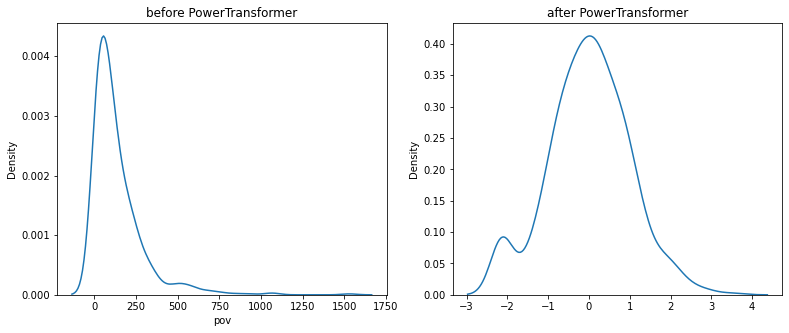

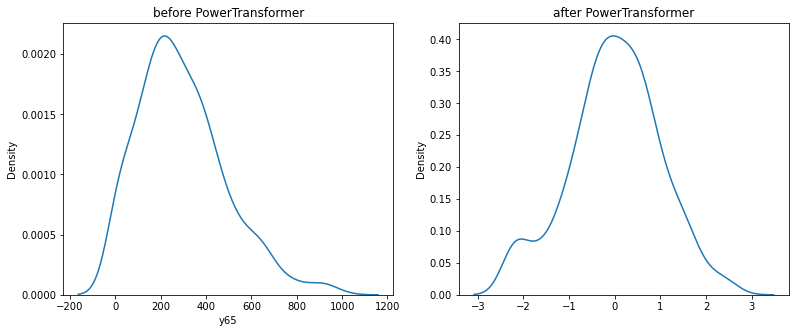

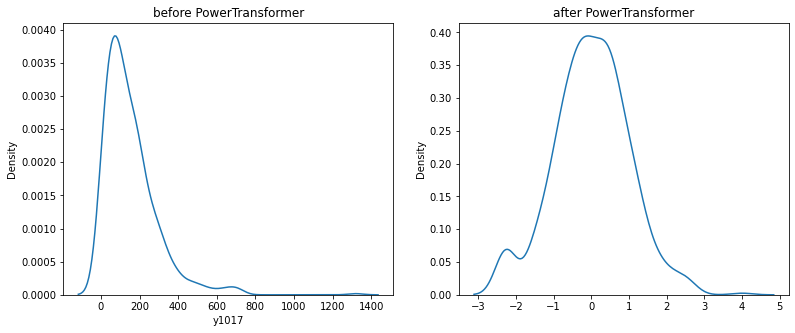

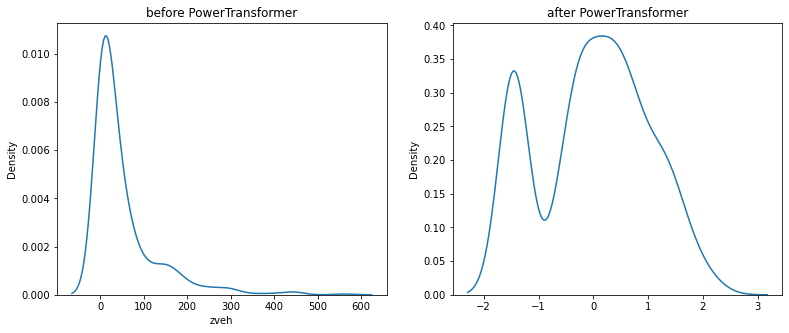

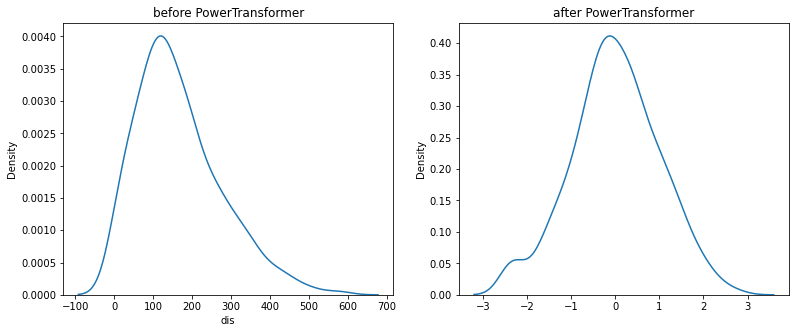

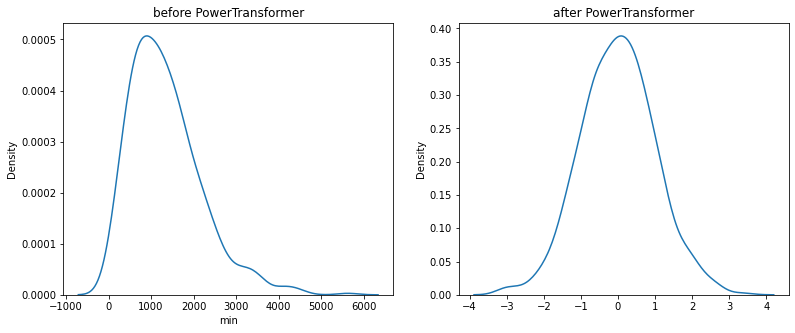

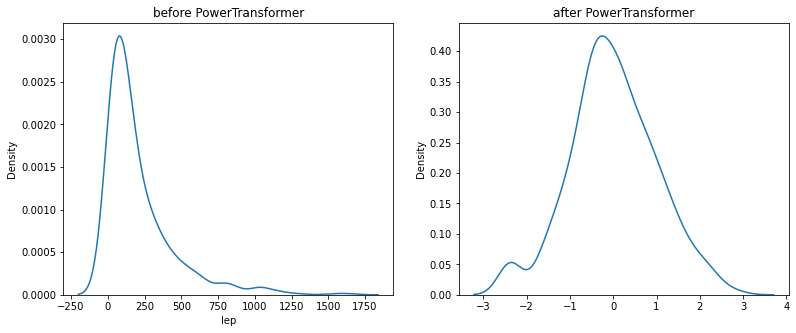

In [31]:
def plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])

    plt.subplot(122)
    p1 =t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

for col in X.columns:
    plots(X, col, PowerTransformer(method='yeo-johnson'))

In [45]:
df=df_join.copy()
df[['pov','y65','y1017','zveh','dis','min','lep']]=PowerTransformer(method='yeo-johnson').fit_transform(df[['pov','y65','y1017','zveh','dis','min','lep']])

In [50]:
#quartiles: divide data into 4 parts. q1=min-median; q2: median; q3= median and max
dfq=df.copy()
dfq['Qpov'] = pd.qcut(dfq['pov'], 3,[1,2,3])
dfq['Qy65'] = pd.qcut(dfq['y65'], 3,[1,2,3])
dfq['Qy1017'] = pd.qcut(dfq['y1017'], 3,[1,2,3])
dfq['Qzveh'] = pd.qcut(dfq['zveh'], 3,[1,2,3])
dfq['Qdis'] = pd.qcut(dfq['dis'], 3,[1,2,3])
dfq['Qmin'] = pd.qcut(dfq['min'], 3,[1,2,3])
dfq['Qlep'] = pd.qcut(dfq['lep'], 3,[1,2,3])

dfq['Qpov'] = dfq['Qpov'].astype(int)
dfq['Qy65'] = dfq['Qy65'].astype(int)
dfq['Qy1017'] = dfq['Qy1017'].astype(int)
dfq['Qzveh'] = dfq['Qzveh'].astype(int)
dfq['Qdis'] = dfq['Qdis'].astype(int)
dfq['Qmin'] = dfq['Qmin'].astype(int)
dfq['Qlep'] = dfq['Qlep'].astype(int)

dfq['total']=dfq['Qpov']+dfq['Qy65']+dfq['Qy1017']+dfq['Qzveh']+dfq['Qdis']+dfq['Qmin']+dfq['Qlep']
dfq['Qtot'] = pd.qcut(dfq['total'], 3,[1,2,3])
dfq=dfq.loc[(dfq['Qtot'] == 3)] 
dfq.shape

(178, 18)

In [52]:
#t6 map
import folium
m = folium.Map(location=[21.461595, -157.954415], zoom_start=11, tiles = 'cartodbpositron')

c=folium.Choropleth(
    geo_data=dfq,
    data=dfq,
    key_on='feature.id',
    columns=['geoid','Qtot'],
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.9,
    line_color='white', 
    line_weight=0,
    highlight=False, 
    smooth_factor=1.0,
    legend_name="Population").add_to(m)

for key in c._children:
    if key.startswith('color_map'):
        del(c._children[key])
        
c.add_to(m)
m

In [ ]:
#military BG????????????????????????

In [53]:
178/579

0.307426597582038